In [201]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd

In [610]:
# import the data
df = pd.read_csv("diabetes.csv")

In [611]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [612]:
# correlation between features
df.iloc[:,:-1].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [613]:
df.iloc[:,:-1].corr()['Pregnancies'].sort_values(ascending=False)

Pregnancies                 1.000000
Age                         0.544341
BloodPressure               0.141282
Glucose                     0.129459
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Insulin                    -0.073535
SkinThickness              -0.081672
Name: Pregnancies, dtype: float64

In [614]:
# data 
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((768, 8), (768,))

In [615]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [616]:
# feature scaling
X_norm = (X-X.min())/(X.max()-X.min())
X_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [617]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X_norm, y, test_size=0.3, random_state=1)

In [618]:
Xtrain.shape, Xtest.shape

((537, 8), (231, 8))

# Decision Tree

In [619]:
# before pruning
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  , random_state=1
                                  , splitter='random'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7705627705627706

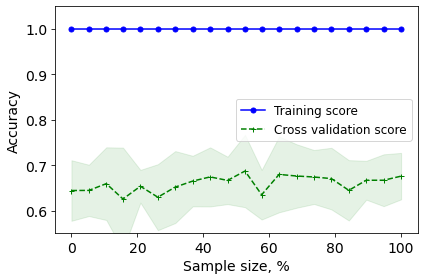

In [620]:
# learning curve without pruning
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

# plt.savefig('tree_learning curve_without pruning.png', dpi=300)

plt.show()

In [621]:
from sklearn.model_selection import GridSearchCV

In [622]:
# grid search
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
               , 'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
               , 'min_samples_split': [5, 10, 20, 30, 40, 50]}]
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [623]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1,
                                              splitter='random'),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13,
                                        14, 15, 16, 17, 18, 19, 20],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 30, 40,
                                               50],
                          'min_samples_split': [5, 10, 20, 30, 40, 50]}],
             return_train_score=True, scoring='accuracy')

In [624]:
grid_search.best_params_

{'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 40}

In [625]:
clf_gs = grid_search.best_estimator_
clf_gs

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3,
                       min_samples_split=40, random_state=1, splitter='random')

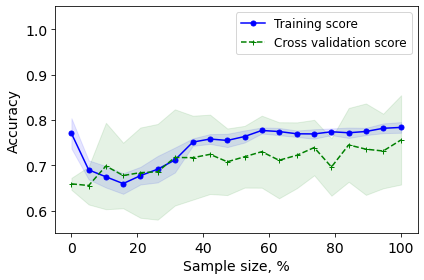

In [627]:
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=clf_gs, X=Xtrain, y=Ytrain, cv=20
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0.55, 1.051)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('tree_learning curve_with pruning.png', dpi=300)

plt.show()

In [628]:
from sklearn.model_selection import validation_curve

In [657]:
train_scores, valid_scores = validation_curve(
    clf_gs,
    Xtest,
    Ytest,
    param_name="max_depth", 
    param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20],
    cv=5,
                                            )

In [658]:
valid_scores.mean(axis=1)

array([0.67974098, 0.74458834, 0.71905643, 0.70101758, 0.7226642 ,
       0.73570768, 0.73570768, 0.73570768, 0.73570768, 0.73570768,
       0.73570768, 0.73570768, 0.73570768, 0.73570768, 0.73570768,
       0.73570768, 0.73570768, 0.73570768, 0.73570768])

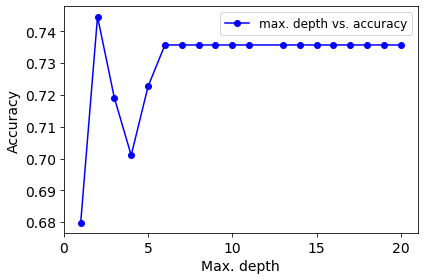

In [659]:
fig, ax = plt.subplots()
param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="max. depth vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Max. depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('tree_validation_1.png', dpi=300)

plt.show()

In [660]:
train_scores, valid_scores = validation_curve(
    clf_gs,
    Xtest,
    Ytest,
    param_name="min_samples_leaf", 
    param_range=np.arange(1, 50, 2),
    cv=5
                                            )

In [661]:
valid_scores.mean(axis=1)

array([0.77483811, 0.73570768, 0.73570768, 0.73570768, 0.74875116,
       0.73570768, 0.74875116, 0.72747456, 0.753284  , 0.753284  ,
       0.74458834, 0.74458834, 0.74458834, 0.73589269, 0.72719704,
       0.70111008, 0.6880666 , 0.6880666 , 0.653284  , 0.66632747,
       0.6880666 , 0.6880666 , 0.6880666 , 0.6880666 , 0.6880666 ])

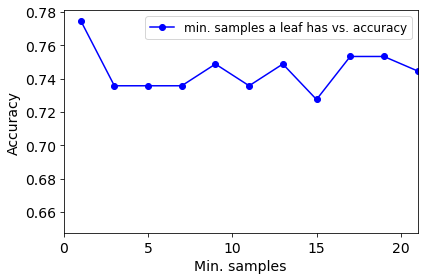

In [662]:
fig, ax = plt.subplots()
param_range=np.arange(1, 50, 2)
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="min. samples a leaf has vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Min. samples', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('tree_validation_2.png', dpi=300)

plt.show()

In [663]:
import time
def running_time(estimator, X, Y):
    start = time.time()
    estimator.fit(X, Y)
    end = time.time()
    return end-start

In [664]:
running_time(clf_gs, Xtrain, Ytrain), running_time(clf_gs, Xtest, Ytest), clf_gs.score(Xtest, Ytest)

(0.003995656967163086, 0.004023551940917969, 0.7965367965367965)

# Neural Network

In [298]:
from sklearn.neural_network import MLPClassifier

In [373]:
# mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), activation='relu', max_iter=800)
mlp = MLPClassifier(max_iter=10000)

In [374]:
mlp.fit(Xtrain, Ytrain)

MLPClassifier(max_iter=10000)

In [375]:
mlp

MLPClassifier(max_iter=10000)

In [376]:
mlp.score(Xtest, Ytest)

0.7922077922077922

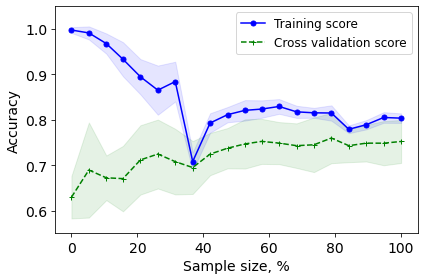

In [377]:
# BP-ANN non-parametric model
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('NN-1.png', dpi=300)

plt.show()

In [379]:
param_grid = [{
    'hidden_layer_sizes': [(8,), (8,8), (8,8,8,), (8,8,8,8)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [2000, 5000, 10000],
}]
grid_search = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [386]:
grid_search.fit(Xtrain, Ytrain)

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lb

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000),
             param_grid=[{'activation': ['tanh', 'relu', 'logistic'],
                          'alpha': [0.0001, 0.05],
                          'hidden_layer_sizes': [(8,), (8, 8), (8, 8, 8),
                                                 (8, 8, 8, 8)],
                          'learning_rate': ['constant', 'adaptive'],
                          'max_iter': [2000, 5000, 10000],
                          'solver': ['sgd', 'adam', 'lbfgs']}],
             return_train_score=True, scoring='accuracy')

In [385]:
mlp_gs = grid_search.best_estimator_
mlp_gs

MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8), max_iter=10000)

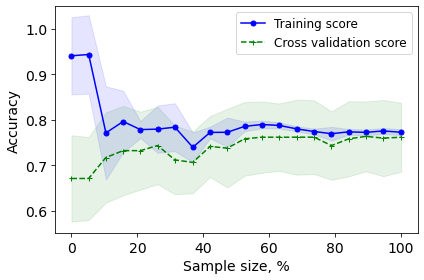

In [382]:
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=mlp_gs, X=Xtrain, y=Ytrain, cv=20
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('NN-2.png', dpi=300)

plt.show()

In [432]:
train_scores, valid_scores = validation_curve(
                                             mlp_gs,
                                             Xtest,
                                             Ytest,
                                             param_name="hidden_layer_sizes", 
                                             param_range=[(8,), (8,8), (8,8,8,), (8,8,8,8)
                                                          , (8,8,8,8,8)
                                                          , (8,8,8,8,8,8)
                                                          , (8,8,8,8,8,8, 8)
                                                          , (8,8,8,8,8,8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                         
                                                                
                                                         ],
                                             cv=5,
                                           )

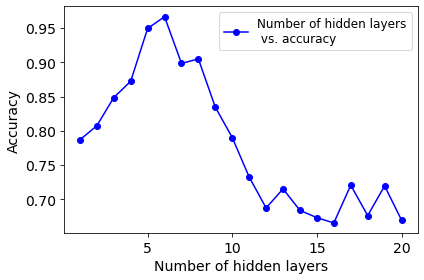

In [433]:
fig, ax = plt.subplots()
# number of hidden layers
Num_hd=[1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20]
ax.plot(Num_hd, valid_scores.mean(axis=1), marker='o', color='blue', label="Number of hidden layers\n vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Number of hidden layers', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('nn_validation_1.png', dpi=300)

plt.show()

In [434]:
train_scores_1, valid_scores_1 = validation_curve(
                                             mlp_gs,
                                             Xtest,
                                             Ytest,
                                             param_name='max_iter', 
                                             param_range=[1, 1000, 1500, 2000, 3000, 4000, 5000, 7000, 10000],
                                             cv=5,
                                           )

C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ruimin\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) rea

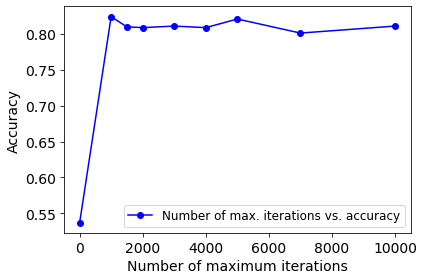

In [435]:
fig, ax = plt.subplots()
# number of hidden layers
Num_iter=[1, 1000, 1500, 2000, 3000, 4000, 5000, 7000, 10000]
ax.plot(Num_iter, valid_scores_1.mean(axis=1), marker='o', color='blue', label="Number of max. iterations vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Number of maximum iterations', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('nn_validation_2.png', dpi=300)

plt.show()

In [504]:
train_scores_2, valid_scores_2 = validation_curve(
                                             mlp_gs,
                                             Xtest,
                                             Ytest,
                                             param_name="hidden_layer_sizes", 
                                             param_range=[(8,), (8,8), (8,8,8,), (8,8,8,8)
                                                          , (8,8,8,8,8)
                                                          , (8,8,8,8,8,8)
                                                          , (8,8,8,8,8,8, 8)
                                                          , (8,8,8,8,8,8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                          , (8,8,8,8,8,8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
                                                         
                                                                
                                                         ],
                                             cv=5,
                                           )

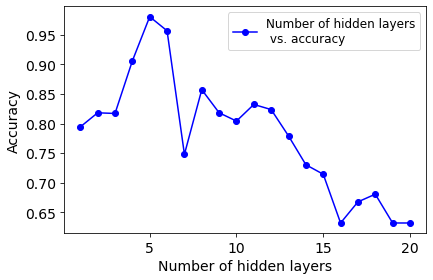

In [506]:
fig, ax = plt.subplots()
# number of hidden layers
Num_hd=[1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20]
ax.plot(Num_hd, valid_scores_2.mean(axis=1), marker='o', color='blue', label="Number of hidden layers\n vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Number of hidden layers', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('nn_validation_3.png', dpi=300)

plt.show()

In [462]:
import tensorflow as tf

In [463]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [481]:
# split Xtrain into X_train, X_valid for validation purpose
X_train, X_valid, Y_train, Y_valid = TTS(Xtrain, Ytrain, test_size=0.2, random_state=1)

In [498]:
nn_model = Sequential()
nn_model.add(tf.keras.Input(shape=(8,8)))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))

In [499]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8, 8)              72        
_________________________________________________________________
dense_5 (Dense)              (None, 8, 2)              18        
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


In [500]:
nn_model.layers

In [501]:
nn_model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])


In [502]:
history = nn_model.fit(X_train, Y_train, epochs=500, validation_data=(X_valid, Y_valid))

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 0.7001 - accuracy: 0.6573 - val_loss: 0.6988 - val_accuracy: 0.6944
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.6597 - val_loss: 0.6973 - val_accuracy: 0.6759
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.6643 - val_loss: 0.6962 - val_accuracy: 0.6852
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.6457 - val_loss: 0.6955 - val_accuracy: 0.6481
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.6434 - val_loss: 0.6951 - val_accuracy: 0.6204
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.6294 - val_loss: 0.6947 - val_accuracy: 0.6111
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.6154 - val_loss: 0.6945 - val_accuracy: 0.6111
Epoch 8/500
1

14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5361 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 55/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5361 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 56/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5361 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 57/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5361 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 58/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5361 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 59/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5338 - val_loss: 0.6939 - val_accuracy: 0.4537
Epoch 60/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4537
Epoch 61/500
14/14 

Epoch 112/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 113/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 114/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 115/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 116/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5338 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 117/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5338 - val_loss: 0.6938 - val_accuracy: 0.4907
Epoch 118/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.4907

14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5408 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 170/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5408 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 171/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5408 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 172/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5408 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 173/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5385 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 174/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5385 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 175/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5408 - val_loss: 0.6937 - val_accuracy: 0.4815
Epoch 176/500

14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5198 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 227/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5221 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 228/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5198 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 229/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5198 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 230/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5245 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 231/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5245 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 232/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5245 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 233/500

14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 284/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5268 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 285/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5268 - val_loss: 0.6936 - val_accuracy: 0.4537
Epoch 286/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5268 - val_loss: 0.6936 - val_accuracy: 0.4630
Epoch 287/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6936 - val_accuracy: 0.4630
Epoch 288/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6936 - val_accuracy: 0.4630
Epoch 289/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6936 - val_accuracy: 0.4630
Epoch 290/500

14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5361 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 341/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5361 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 342/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5361 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 343/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5338 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 344/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5338 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 345/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5338 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 346/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5361 - val_loss: 0.6935 - val_accuracy: 0.4630
Epoch 347/500

14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 398/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5315 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 399/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5315 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 400/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 401/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 402/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 403/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5291 - val_loss: 0.6935 - val_accuracy: 0.4815
Epoch 404/500

14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 455/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 456/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 457/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 458/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5245 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 459/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 460/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5268 - val_loss: 0.6935 - val_accuracy: 0.4722
Epoch 461/500

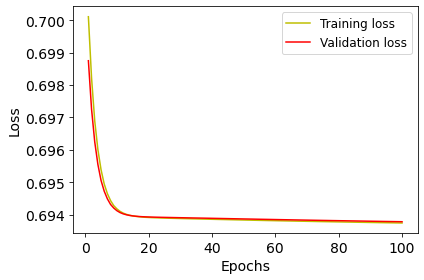

In [509]:
fig, ax = plt.subplots()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax.plot(epochs[:100], loss[:100], 'y', label='Training loss')
ax.plot(epochs[:100], val_loss[:100], 'r', label='Validation loss')

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('loss curve.png', dpi=300)

plt.show()

In [665]:
running_time(mlp_gs, Xtrain, Ytrain), running_time(mlp_gs, Xtest, Ytest), mlp_gs.score(Xtest, Ytest)

(0.5037107467651367, 0.49971580505371094, 0.7965367965367965)

# Adaboosting

In [513]:
from sklearn.ensemble import AdaBoostClassifier

In [515]:
from sklearn.tree import DecisionTreeClassifier

In [516]:
# non-parametric model ---default values
ada_clf = AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=1), 
                n_estimators=200,
                algorithm='SAMME.R',
                learning_rate=0.5,
                )
ada_clf = ada_clf.fit(Xtrain, Ytrain)

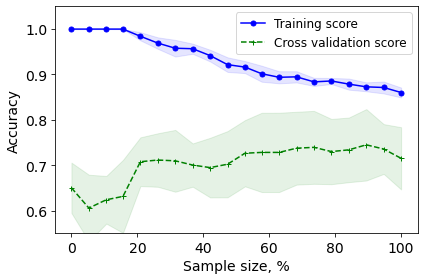

In [517]:
# learning curve without pruning
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=ada_clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('ada_learning curve_1.png', dpi=300)

plt.show()

In [526]:
# grid search
param_grid = [{'n_estimators': [50, 100, 150, 200, 300, 400]
               , 'learning_rate': [1.0, 0.1, 0.01, 0.001]
             }]
grid_search = GridSearchCV(ada_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [527]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          learning_rate=0.5, n_estimators=200),
             param_grid=[{'learning_rate': [1.0, 0.1, 0.01, 0.001],
                          'n_estimators': [50, 100, 150, 200, 300, 400]}],
             return_train_score=True, scoring='accuracy')

In [528]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [529]:
ada_clf_gs = grid_search.best_estimator_
ada_clf_gs

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=150)

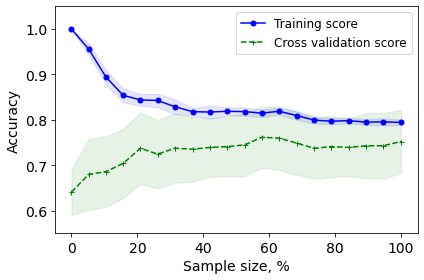

In [530]:
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=ada_clf_gs, X=Xtrain, y=Ytrain, cv=20
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('ada_learning curve_2.png', dpi=300)

plt.show()

In [541]:
train_scores, valid_scores = validation_curve(
    ada_clf_gs,
    Xtest,
    Ytest,
    param_name="n_estimators", 
    param_range=[75, 100, 125, 150, 175, 200],
    cv=5
                                            )

In [542]:
valid_scores.mean(axis=1)

array([0.77502313, 0.77511563, 0.78353377, 0.77918594, 0.77493062,
       0.77493062])

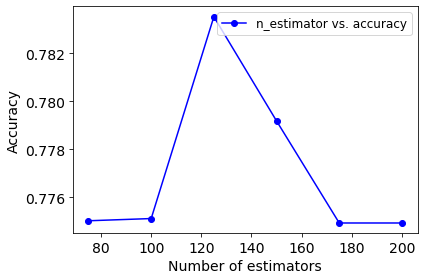

In [544]:
fig, ax = plt.subplots()
param_range=[75, 100, 125, 150, 175, 200]
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="n_estimator vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Number of estimators', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('ada_validation_1.png', dpi=300)

plt.show()

In [538]:
param_range, valid_scores.mean(axis=1)

([100, 125, 150, 175, 200],
 array([0.77511563, 0.78353377, 0.77918594, 0.77493062, 0.77493062]))

In [545]:
train_scores_2, valid_scores_2 = validation_curve(
    ada_clf_gs,
    Xtest,
    Ytest,
    param_name="learning_rate", 
    param_range=[1.0, 0.1, 0.01, 0.001, 0.0001],
    cv=5
                                            )

In [548]:
valid_scores_2.mean(axis=1)

array([0.73589269, 0.77918594, 0.75300648, 0.7400555 , 0.7400555 ])

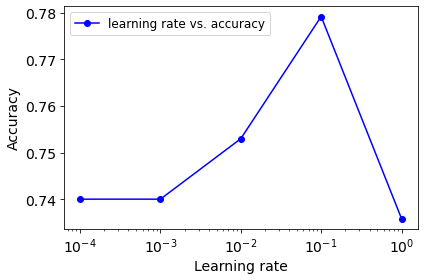

In [552]:
fig, ax = plt.subplots()
param_range=[1.0, 0.1, 0.01, 0.001, 0.0001]
ax.plot(param_range, valid_scores_2.mean(axis=1), marker='o', color='blue', label="learning rate vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Learning rate', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
ax.set_xscale('log')

plt.tight_layout()

plt.savefig('ada_validation_2.png', dpi=300)

plt.show()

In [666]:
running_time( ada_clf_gs, Xtrain, Ytrain), running_time(ada_clf_gs, Xtest, Ytest),  ada_clf_gs.score(Xtest, Ytest)

(0.0039823055267333984, 0.0020139217376708984, 0.8181818181818182)

# SVM

In [554]:
from sklearn.svm import SVC

In [555]:
# non-parametric model ---default values
# linear kernel
svc_clf = SVC(C=1.0, kernel='linear')
svc_clf = svc_clf.fit(Xtrain, Ytrain)

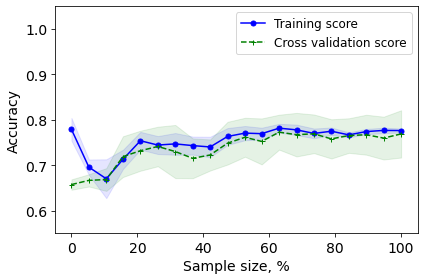

In [556]:
# learning curve --- linear kernel
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=svc_clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('svc_learning curve_1.png', dpi=300)

plt.show()

In [559]:
# non-parametric model ---default values
# nonlinear kernel
nonlinear_svc_clf = SVC(C=1.0, kernel='rbf')
nonlinear_svc_clf = nonlinear_svc_clf.fit(Xtrain, Ytrain)

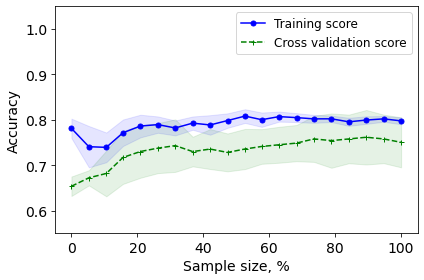

In [560]:
# learning curve --- nonlinear kernel
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=nonlinear_svc_clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('svc_learning curve_2.png', dpi=300)

plt.show()

In [561]:
train_scores, valid_scores = validation_curve(
    nonlinear_svc_clf,
    Xtest,
    Ytest,
    param_name="C", 
    param_range=[0.01, 0.1, 1, 10, 100],
    cv=5
                                            )

In [562]:
valid_scores.mean(axis=1)

array([0.6320074 , 0.69703978, 0.7880666 , 0.78381129, 0.77076781])

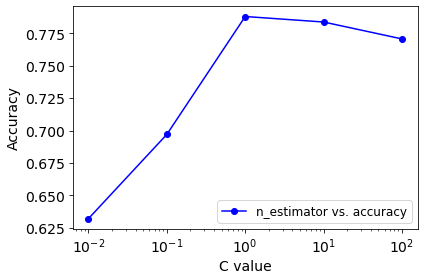

In [565]:
fig, ax = plt.subplots()
param_range=[0.01, 0.1, 1, 10, 100]
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="n_estimator vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('C value', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)

ax.set_xscale('log')
plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('svm_validation_1.png', dpi=300)

plt.show()

In [568]:
# non-parametric model ---default values
# nonlinear kernel
nonlinear_svc_clf = SVC(C=0.1, kernel='rbf')
nonlinear_svc_clf = nonlinear_svc_clf.fit(Xtrain, Ytrain)

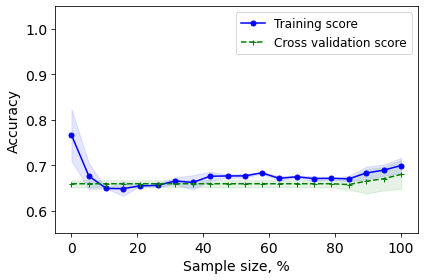

In [569]:
# learning curve --- nonlinear kernel
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=nonlinear_svc_clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('svc_learning curve_3.png', dpi=300)

plt.show()

In [669]:
running_time(svc_clf, Xtrain, Ytrain), running_time(svc_clf, Xtest, Ytest), svc_clf.score(Xtest, Ytest)

(0.007995367050170898, 0.002998828887939453, 0.7792207792207793)

In [668]:
running_time(nonlinear_svc_clf, Xtrain, Ytrain), running_time(nonlinear_svc_clf, Xtest, Ytest), nonlinear_svc_clf.score(Xtest, Ytest)

(0.011995077133178711, 0.0030074119567871094, 0.7359307359307359)

# KNN

In [572]:
from sklearn.neighbors import KNeighborsClassifier

In [573]:
knn_clf = KNeighborsClassifier()
knn_clf = knn_clf.fit(Xtrain, Ytrain)

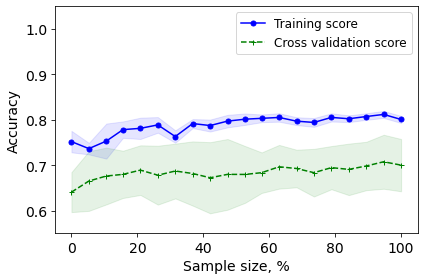

In [574]:
# learning curve --- nonlinear kernel
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=knn_clf, X=Xtrain, y=Ytrain, cv=10
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.set_ylim(0.55, 1.05)
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('knn_learning curve_1.png', dpi=300)

plt.show()

In [605]:
# grid search
param_grid = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size': [10, 20, 30, 40, 50, 60],
               
             }]
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [606]:
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': [10, 20, 30, 40, 50, 60],
                          'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [607]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 2,
 'weights': 'uniform'}

In [608]:
knn_clf_gs = grid_search.best_estimator_
knn_clf_gs

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2)

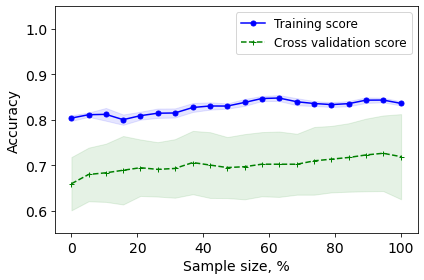

In [609]:
fig, ax = plt.subplots()

train_sizes, train_scores, test_scores = learning_curve(estimator=knn_clf_gs, X=Xtrain, y=Ytrain, cv=20
                                                        , train_sizes=np.r_[0.1:1:20j]
                                                         )

train_sizes_norm = 100*(train_sizes-train_sizes.min())/(train_sizes.max()-train_sizes.min())


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



# training score
ax.plot(train_sizes_norm, train_mean, color='blue', marker='o', markersize=5, label='Training score')
ax.fill_between(train_sizes_norm
                    , train_mean-train_std
                    , train_mean+train_std
                    , alpha=0.1
                    , color='blue'
                    )

# validation score
plt.plot(train_sizes_norm, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Cross validation score')
ax.fill_between(train_sizes_norm
                    , test_mean-test_std
                    , test_mean+test_std
                    , alpha=0.1
                    , color='green'
                    )

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Sample size, %', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0.55, 1.05)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('knn_learning curve_2.png', dpi=300)

plt.show()

In [598]:
train_scores, valid_scores = validation_curve(
    knn_clf,
    Xtest,
    Ytest,
    param_name="n_neighbors", 
    param_range= np.arange(2, 19),
    cv=5
                                            )

In [599]:
valid_scores.mean(axis=1)

array([0.74024052, 0.78815911, 0.74468085, 0.74449584, 0.72747456,
       0.76623497, 0.753284  , 0.75763182, 0.76197965, 0.75772433,
       0.74902868, 0.76207216, 0.77511563, 0.77502313, 0.77946346,
       0.78371878, 0.77493062])

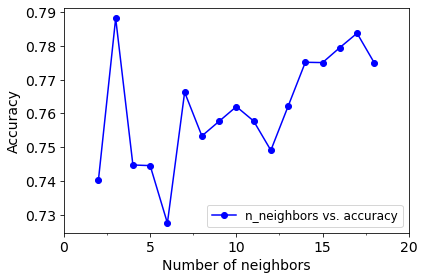

In [604]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots()
param_range= np.arange(2, 19)
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="n_neighbors vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Number of neighbors', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.55, 1.05)

ax.set_xlim(0,20)


ax.xaxis.set_major_locator(MultipleLocator(5))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(2.5))

plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('knn_validation_1.png', dpi=300)

plt.show()

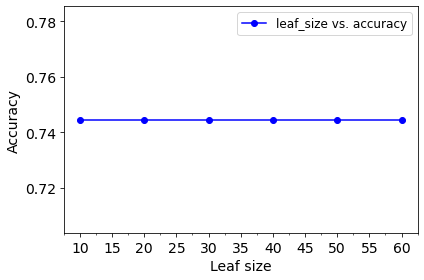

In [674]:
train_scores, valid_scores = validation_curve(
                                    knn_clf,
                                    Xtest,
                                    Ytest,
                                    param_name="leaf_size", 
                                    param_range= [10, 20, 30, 40, 50, 60],
                                    cv=5
                                            )

fig, ax = plt.subplots()
param_range= [10, 20, 30, 40, 50, 60]
ax.plot(param_range, valid_scores.mean(axis=1), marker='o', color='blue', label="leaf_size vs. accuracy")

# set fontsize, labelsize
ax.tick_params(axis='both', size=4, labelsize=14)
ax.set_xlabel('Leaf size', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
# ax.set_ylim(0.74, 0.76)

# ax.set_xlim(0,20)


ax.xaxis.set_major_locator(MultipleLocator(5))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(2.5))

plt.legend(fontsize=12)
# ax.set_xlim(0, 21)

plt.tight_layout()

plt.savefig('knn_validation_2.png', dpi=300)

plt.show()

In [667]:
running_time(knn_clf_gs, Xtrain, Ytrain), running_time(knn_clf_gs, Xtest, Ytest), knn_clf_gs.score(Xtest, Ytest)

(0.0039827823638916016, 0.0019979476928710938, 0.8528138528138528)